<a href="https://colab.research.google.com/github/Gabriel1Vitor/fraudes-card/blob/main/fraud_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import shap

#como identificar fraudes
card=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

#a resposta
naofraude=card[card['Class']<1]
fraude=card[card["Class"]==1]

#como eu chego mais perto dela
x=card.drop(columns=["Class"])
y=card["Class"]
xtr,xts,ytr,yts=train_test_split(x,y,random_state=30,test_size=0.3)

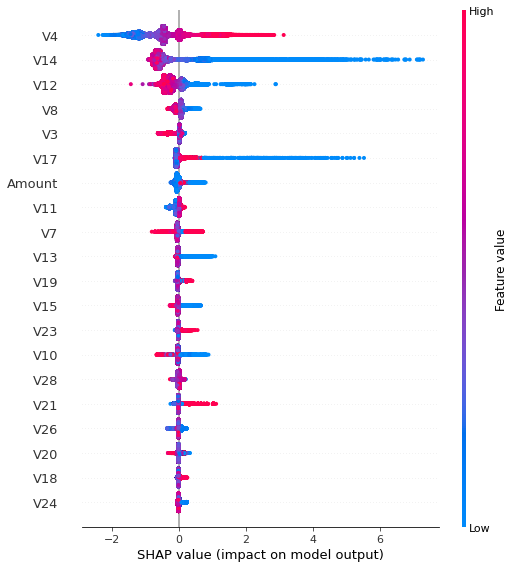

In [ ]:
#primeiro modelo
xgc=XGBClassifier(random_state=0,learning_rate=0.1,n_estimators=100)
xgc.fit(xtr,ytr)
prev=xgc.predict(xts)
mean=mean_absolute_error(yts,prev)
mean
#intepredador de modelo
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(xtr)
shap.summary_plot(shap_values, xtr)

In [ ]:
#segundo modelo
rid=RidgeClassifier(random_state=0)
rid.fit(xtr,ytr)
prev=rid.predict(xts)
mean2=mean_absolute_error(yts,prev)
mean2

0.0011352597638191542

In [3]:
#terceiro modelo
dtc=DecisionTreeClassifier(random_state=0,min_samples_split=3)
dtc.fit(xtr,ytr)
prev=dtc.predict(xts)
mean3=mean_absolute_error(yts,prev)
mean3

#previçao da tabela inteira primeira camada
card["previcoes"]=dtc.predict(x)

In [ ]:
#quarto modelo 

#é maior por causa que sem amount aumenta sua taxa de acerto
x1=card.drop(columns=["Class","Amount"])
xtr1,xts1,ytr1,yts1=train_test_split(x1,y,random_state=0,test_size=0.3)

rfc=RandomForestClassifier(random_state=30,min_samples_split=2)
rfc.fit(xtr1,ytr1)
prev=rfc.predict(xts1)
mean4=mean_absolute_error(yts1,prev)
mean4

0.0004915557740247885

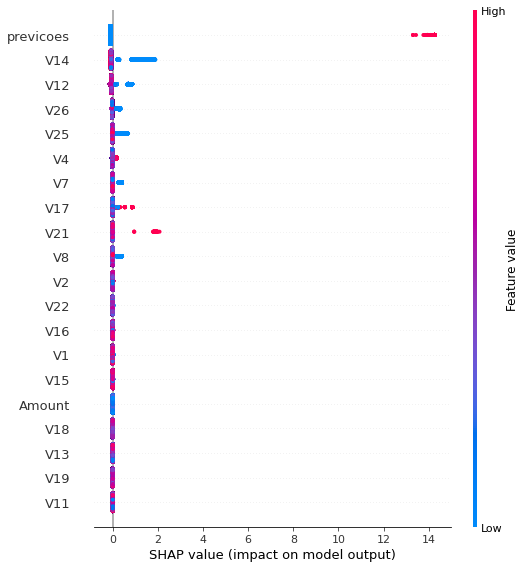

In [4]:
#numero com ou sem a coluna Amount 
mod=[" ","xgc","rid","dtc","rfc"],["com",0.00046814835621408426,0.0011352597638191542,0.0008192596233746474,0.0005149631918354927],["sem",0.00046814835621408426,0.0011352597638191542,0.0008543707500907038,0.0004915557740247885]
mod=pd.DataFrame(mod)

#segunda camada de dtc + xgc
x1=card.drop(columns=["Class"])
xtr1,xts1,ytr1,yts1=train_test_split(x1,y,random_state=30,test_size=0.3)

xgc=XGBClassifier(random_state=0,learning_rate=0.1,n_estimators=100)
xgc.fit(xtr1,ytr1)
prev=xgc.predict(x1)
mean=mean_absolute_error(y,prev)
mean

explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(xtr1)
shap.summary_plot(shap_values, xtr1)

In [5]:
mean

0.0002492916255569561

a uma melhora usando uma rede,como pre procesamento,mas ele esta usando isso como principal escolha 

In [1]:
#shap precisa ser baixado colab (bug)
! pip install shap

     |████████████████████████████████| 564 kB 6.1 MB/s 
